In [49]:
import pandas as pd
import seaborn as sns

In [50]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [51]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [52]:
data.shape

(200, 4)

#### What are the features?

1. TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
2. Radio: advertising dollars spent on Radio
3. Newspaper: advertising dollars spent on Newspaper

#### What is the response?

4. Sales: sales of a single product in a given market (in thousands of items)

#### What else do we know?

5. Because the response variable is continuous, this is a **regression** problem.
6. There are 200 observations (represented by the rows), and each observation is a single market.

In [53]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

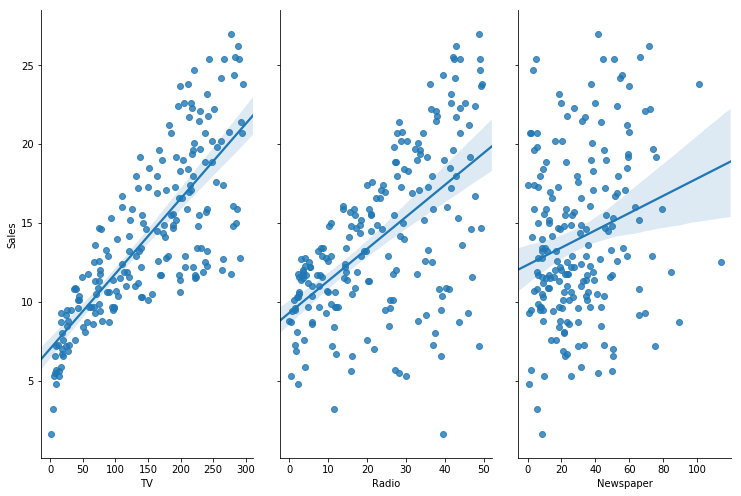

In [54]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.5, kind='reg')

## Preparing X and y using pandas

In [55]:
# Feature Names
feature_cols = ['TV', 'Radio', 'Newspaper']

# All X
X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [56]:
X.shape

(200, 3)

In [57]:
# selecting target
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [58]:
y.shape

(200,)

## Splitting X and y into training and testing sets

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

In [95]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(170, 3)
(170,)
(30, 3)
(30,)


## Linear regression in Scikit-Learn

In [96]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
model = LinearRegression()

# fit the model to the training data (learn the coefficients)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

3.01165591942
[ 0.0444108   0.19737346 -0.00283292]


In [98]:
# pair the feature names with the coefficients
list(zip(feature_cols, model.coef_))

[('TV', 0.044410798911014293),
 ('Radio', 0.19737346310053647),
 ('Newspaper', -0.0028329200310274992)]

$ y = 2.88 + 0.0466 \space X \space TV + 0.179 \space X \space Radio + 0.00345 \space X \space Newspaper $

How do we interpret the TV coefficient (0.0466)?

1. For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.

2. Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional USD 1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

### Making Predictions

In [99]:
y_pred = model.predict(X_test)

In [100]:
from sklearn import metrics
import numpy as np

# using sklearn
print(metrics.mean_squared_error(y_test, y_pred))

# using formula
np.mean((y_pred-y_test)**2)

5.35577478243


5.3557747824312356

In [101]:
y_test[0:5]

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
Name: Sales, dtype: float64

In [102]:
y_pred[0:5]

array([ 10.07919676,   7.46960231,   7.01988044,  24.08131635,  12.01016812])